In [1]:
from scipy.fftpack import fft;
import matplotlib.pyplot as plt;
import numpy as np;
import scipy.io as sio;
import numpy as np;
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
!cp /content/drive/MyDrive/Laboratorio_Bioseñales/datos_senales_datos_parkinson_cursos.zip .
!unzip datos_senales_datos_parkinson_cursos.zip

Archive:  datos_senales_datos_parkinson_cursos.zip
replace control/C001R_EP_reposo.mat? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [20]:
import os
directorio_actual=os.getcwd()
print(directorio_actual)

/content


Provenientes de los pacientes control

In [5]:
archivos=os.listdir(directorio_actual + "/control")
print(len(archivos))

36


Los archivos están en formato .mat

In [6]:
archivos[0]

'C015_EP_reposo.mat'

In [7]:
#ruta de un archivo
path_subjecti=(directorio_actual + "/control" + "/" + archivos[0])
#1 CARGAR EL ARCHIVO
data = sio.loadmat(path_subjecti)
data=data['data']

In [8]:
data.shape

(8, 2000, 140)

In [9]:
print("Variable python: " + str(type(data)));
#características básicas de ndarray
print("Tipo de variable cargada: " + str(data.dtype));
print("Dimensiones de los datos cargados: " + str(data.shape));
print("Numero de dimensiones: " + str(data.ndim));
print("Tamanio: " + str(data.size));
print("Tamanio en memoria (bytes): " + str(data.nbytes));

Variable python: <class 'numpy.ndarray'>
Tipo de variable cargada: float64
Dimensiones de los datos cargados: (8, 2000, 140)
Numero de dimensiones: 3
Tamanio: 2240000
Tamanio en memoria (bytes): 17920000


In [10]:
senal_continua = np.reshape(data,(data.shape[0],data.shape[1]*data.shape[2]),order='F')

In [11]:
senal_continua.shape

(8, 280000)

Dimensiones de los datos cargados: (8, 280000)


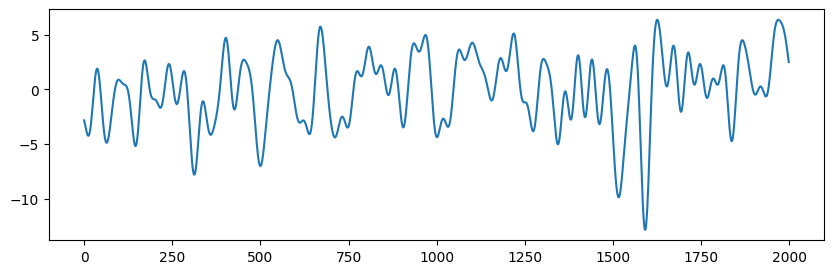

In [12]:
print("Dimensiones de los datos cargados: " + str(senal_continua.shape));
fig = plt.figure(figsize=(10,3))
#fig.subplots_adjust(hspace=0.4, wspace=0.4)
plt.plot(senal_continua[0,0:2000])
plt.show()

## **Comparación estadística de Energía de señales EEG**

In [13]:
def energiapromedio(signal): #Recibe una señal con la forma: (Canales, muestras, épocas)
    energia_epoca = np.sum(np.square(signal), axis=1) #Primero se le calcula el cuadrado a todos los elementos de la señal y luego se suman
    energia_promedio = np.mean(energia_epoca, axis=1) #Se calcula el promedio, y se pone axis=1, que corresponde al eje de las épocas.
    return energia_promedio

In [32]:
#energia_promedio = energiapromedio(data) #Prueba
#print(f'La energía promedio del sujeto {archivos[0]} por épocas de cada canal es: {energia_promedio}')

La energía promedio del sujeto C015_EP_reposo.mat por épocas de cada canal es: [11419.72048044 13899.30816761 15693.42349075  9310.79825328
  9919.08439515 38555.79400548 36669.08077287 48958.80906577]


In [36]:
Energia_sujetos={}
archivos_control = os.listdir(directorio_actual + "/control")
print("Número de archivos en control:", len(archivos_control))
# Cargar y procesar los archivos de los sujetos control
for i in range(len(archivos_control)):
    ruta_archivo = os.path.join(directorio_actual + "/control", archivos_control[i])
    data = sio.loadmat(ruta_archivo)
    data = data["data"]
    energia_promedio = energiapromedio(data)
    Energia_sujetos[f'Sujeto {i+1}'] = energia_promedio

Número de archivos en control: 36


In [37]:
columnas=[f'Canal {i+1}' for i in range(0,8)] #Se establece un rango de acuerdo al número de canales.
df_control = pd.DataFrame.from_dict(Energia_sujetos, orient='index', columns=columnas)


In [38]:
df_control

,Canal 1,Canal 2,Canal 3,Canal 4,Canal 5,Canal 6,Canal 7,Canal 8
Sujeto 1,17567.465030,21738.511853,29429.308030,28530.200793,24586.407386,73273.828899,68753.985484,67962.795266
Sujeto 2,11197.554574,10948.368805,12737.004665,10745.161921,10329.642418,21461.605831,15493.212776,27414.375247
Sujeto 3,14798.253355,25379.940073,14356.020122,12288.656607,11694.967690,33493.547072,32447.412642,35561.860821
Sujeto 4,25807.598672,31148.334573,28640.385345,21025.777687,18251.804557,148225.533204,123954.279562,139100.707347
Sujeto 5,13352.558858,12079.042337,12056.752677,13537.102069,13418.269716,38883.704467,37960.013947,37046.836341
Sujeto 6,4915.062778,6105.849947,5167.552339,4137.717862,4103.995281,20359.586331,17598.962585,22292.230470
Sujeto 7,11920.628977,12381.108138,11545.897906,11616.229122,18658.417865,42058.456657,34417.780679,46167.748438
Sujeto 8,47166.556798,55107.798641,52286.884667,34682.656928,30606.119338,227045.733387,224891.029478,322172.431642
Sujeto 9,13180.109317,13925.217812,16218.994223,12324.883659,14060.300659,25767.024864,21935.759622,22827.781293
Sujeto 10,33100.991142,37083.630148,48210.820005,37758.393155,28343.182930,101170.614692,87824.803410,137143.924875


**Pacientes Parkinson**

In [39]:
Energia_parkinson={}
archivos_parkinson= os.listdir(directorio_actual + "/parkinson")
print("Número de archivos en control:", len(archivos_parkinson))
# Cargar y procesar los archivos de los sujetos control
for i in range(len(archivos_parkinson)):
    ruta_archivo = os.path.join(directorio_actual + "/parkinson", archivos_parkinson[i])
    data = sio.loadmat(ruta_archivo)
    data = data["data"]
    energia_promedio = energiapromedio(data)
    Energia_parkinson[f'Sujeto {i+1}'] = energia_promedio

Número de archivos en control: 23


In [40]:
df_parkinson = pd.DataFrame.from_dict(Energia_parkinson, orient='index', columns=columnas)

In [41]:

df_parkinson

,Canal 1,Canal 2,Canal 3,Canal 4,Canal 5,Canal 6,Canal 7,Canal 8
Sujeto 1,14532.459483,17860.192841,30120.983497,29569.273094,30054.971601,22088.181162,18262.518633,18454.068489
Sujeto 2,23658.738825,23990.255991,30633.745996,22888.894132,19932.315538,65161.432397,60552.834862,58441.048743
Sujeto 3,17995.660058,12001.601821,12286.344400,14785.908284,17058.433161,63983.449318,53715.460772,66403.639479
Sujeto 4,23446.051598,26091.341850,36640.531850,25660.222773,31330.549186,93696.128392,67690.908167,111124.343428
Sujeto 5,16776.577493,20468.685954,25320.621029,24036.472073,20723.732743,76391.356727,60599.129053,81585.412935
Sujeto 6,23742.325612,22070.007569,24540.315612,21803.936448,22594.339745,128314.264805,128888.485633,152799.284248
Sujeto 7,10692.948223,10841.187262,12154.390086,24161.685202,14789.173543,43302.825848,42560.941845,39043.973220
Sujeto 8,48574.518921,51806.529769,73171.952374,59707.699631,56552.175747,287105.761622,222745.793414,353312.298104
Sujeto 9,17699.028112,26643.280393,32468.842059,25561.956895,23415.623101,57294.133077,54829.651258,59700.873328
Sujeto 10,9581.810471,14008.572615,9589.230257,9374.085669,8154.941858,28970.848994,40705.897395,36624.858559


## **Prueba de normalidad Shapiro-Wilks**  

Se hace esta prueba para evaluar normalidad. El test de Shapiro-Wilks plantea la hipótesis nula de que una muestra proviene de una distribución normal. En este caso, se eligió un nivel de significancia de 0,05.

Hipótesis nula (H0): La señal tiene una distribución es normal.

Hipótesis alternativa (H1): La señal tiene una distribución no es normal.



In [42]:
df_control.columns

Index(['Canal 1', 'Canal 2', 'Canal 3', 'Canal 4', 'Canal 5', 'Canal 6',
       'Canal 7', 'Canal 8'],
      dtype='object')

In [43]:
alpha=0.05

In [44]:
from scipy.stats import shapiro, levene

def Prueba_ShapiroWilks(df, alpha):
    normalidad = {}
    for canal in df.columns:
        stats, p_value = shapiro(df[canal])
        normalidad[canal] = p_value
        if p_value <= alpha:
            print(f'{canal}: p-value = {p_value}. No sigue una distribución normal.')
        elif p_value >= alpha:
            print(f'{canal}: p-value = {p_value}. Sigue una distribución normal.')
    return normalidad

**Prueba para los sujetos de control**

In [45]:
shapiro_control = Prueba_ShapiroWilks(df_control, alpha)

Canal 1: p-value = 0.00625258258949084. No sigue una distribución normal.
Canal 2: p-value = 0.003954349672893081. No sigue una distribución normal.
Canal 3: p-value = 0.008902474388641331. No sigue una distribución normal.
Canal 4: p-value = 0.0001969822134533634. No sigue una distribución normal.
Canal 5: p-value = 0.0007995109321302042. No sigue una distribución normal.
Canal 6: p-value = 6.077846333124141e-06. No sigue una distribución normal.
Canal 7: p-value = 4.219023053060516e-06. No sigue una distribución normal.
Canal 8: p-value = 5.307787994214503e-07. No sigue una distribución normal.


**Prueba para los pacientes con Parkinson**

In [46]:
shapiro_parkinson = Prueba_ShapiroWilks(df_parkinson, alpha)

Canal 1: p-value = 0.014391748809352454. No sigue una distribución normal.
Canal 2: p-value = 0.004522125702176784. No sigue una distribución normal.
Canal 3: p-value = 0.0009095814679302174. No sigue una distribución normal.
Canal 4: p-value = 0.00031213125786319976. No sigue una distribución normal.
Canal 5: p-value = 0.00532299059293227. No sigue una distribución normal.
Canal 6: p-value = 9.81469511101429e-06. No sigue una distribución normal.
Canal 7: p-value = 1.6702065098807628e-05. No sigue una distribución normal.
Canal 8: p-value = 8.983359631665299e-06. No sigue una distribución normal.


## **Prueba de homocedasticidad - Prueba de Levene**  

Dado que los canales no siguen una distribución normal, una de las pruebas recomendadas para evaluar la homocedasticidad es la Prueba de Levene.  

Si el valor p de la prueba de Levene es superior a 0.05, las varianzas no son significativamente diferentes entre sí (es decir, se cumple el supuesto de homogeneidad de la varianza). Si el valor p de la prueba de Levene es inferior a 0.05, entonces existe una diferencia significativa entre las varianzas.

H0: Los grupos tienen varianzas iguales.

H1: Los grupos tienen varianzas diferentes.

In [47]:
from scipy.stats import levene

def Prueba_Levene(df_control, df_pacientes, alpha):
    homocedasticidad={}
    for canal in df_control.columns:
        stat, p_value = levene(df_control[canal], df_pacientes[canal])
        homocedasticidad[canal] = p_value
        if p_value <= alpha:
            print(f'{canal}: p-value = {p_value}. No cumple con el criterio de homocedasticidad.')
        elif p_value > alpha:
            print(f'{canal}: p-value = {p_value}. Cumple con el criterio de homocedasticidad.')
    return homocedasticidad

In [48]:
homocedasticidad = Prueba_Levene(df_control, df_parkinson, alpha)

Canal 1: p-value = 0.8848020019348577. Cumple con el criterio de homocedasticidad.
Canal 2: p-value = 0.9590926426745954. Cumple con el criterio de homocedasticidad.
Canal 3: p-value = 0.9776337925998679. Cumple con el criterio de homocedasticidad.
Canal 4: p-value = 0.7592528471707681. Cumple con el criterio de homocedasticidad.
Canal 5: p-value = 0.9045548264900758. Cumple con el criterio de homocedasticidad.
Canal 6: p-value = 0.4719758936966434. Cumple con el criterio de homocedasticidad.
Canal 7: p-value = 0.6178759981277988. Cumple con el criterio de homocedasticidad.
Canal 8: p-value = 0.5940765419878595. Cumple con el criterio de homocedasticidad.


## **Prueba para determinar si existen diferencias entre los canales entre grupos de sujetos.**  
Dado que los datos no cumplen con todos los supuestos requeridos para realizar una T-Test, se realizará una prueba de U-Mann Whitney para realizar un análisis no paramétrico.  
Las hipótesis son:

H0: Los canales no entregan información diferencial estadísticamente significativa entre sujetos sanos y pacientes con la enfermedad de Parkinson.

H1: Los canales entregan información diferencial estadísticamente significativa entre sujetos sanos y pacientes con la enfermedad de Parkinson.

In [49]:
def U_test(df_control, df_pacientes, alpha):
    resultados_U_test = {}
    for canal in df_control.columns:
        stat, p_value = stats.mannwhitneyu(df_control[canal], df_pacientes[canal], alternative='two-sided')
        resultados_U_test[canal] = p_value
        if p_value <= alpha:
            print(f'{canal}: p-value = {p_value}. El canal entrega información diferencial entre sujetos sanos y con enfermedad de Parkinson.')
        elif p_value >= alpha:
            print(f'{canal}: p-value = {p_value}. El canal no entrega información diferencial entre sujetos sanos y con enfermedad de Parkinson.')
    return resultados_U_test

resultados_U_test = U_test(df_control, df_parkinson, alpha)

Canal 1: p-value = 0.4057005715724912. El canal no entrega información diferencial entre sujetos sanos y con enfermedad de Parkinson.
Canal 2: p-value = 0.5705282028889593. El canal no entrega información diferencial entre sujetos sanos y con enfermedad de Parkinson.
Canal 3: p-value = 0.46037288907343565. El canal no entrega información diferencial entre sujetos sanos y con enfermedad de Parkinson.
Canal 4: p-value = 0.23446184956559823. El canal no entrega información diferencial entre sujetos sanos y con enfermedad de Parkinson.
Canal 5: p-value = 0.5600175059745567. El canal no entrega información diferencial entre sujetos sanos y con enfermedad de Parkinson.
Canal 6: p-value = 0.2800747649284743. El canal no entrega información diferencial entre sujetos sanos y con enfermedad de Parkinson.
Canal 7: p-value = 0.11830081572892007. El canal no entrega información diferencial entre sujetos sanos y con enfermedad de Parkinson.
Canal 8: p-value = 0.15054429358714408. El canal no entrega

## **ANÁLISIS**  
Al aplicar la prueba de normalidad de Shapiro-Wilks se evidenció que las señales tanto de individuos sanos como de pacientes con Parkinson no presentan un comportamiento normal. Esto ocurre porque las señales EEG poseen una elevada complejidad y no se distribuyen de forma simétrica, ya que se tratan de señales estocásticas que varían de manera considerable según la posición del electrodo y la región cerebral analizada. Además, la ausencia de normalidad puede estar relacionada con factores externos, como el ruido generado por artefactos, electrodos defectuosos, movimientos oculares, contracciones musculares y, principalmente, con las oscilaciones de las bandas de frecuencia (delta, theta, alfa, beta y gamma). Dichas oscilaciones difieren de acuerdo con el área del cerebro, el nivel de atención y la presencia de trastornos neurológicos como el Parkinson [1]. En este contexto, la banda beta presenta una actividad anómala elevada en pacientes con Parkinson, lo que contribuye de manera importante a la desviación de la normalidad observada en las señales [2].  

La prueba de Levene evidenció que todos los canales presentaron homocedasticidad, es decir, las varianzas entre grupos se mantuvieron homogéneas. No obstante, debido a la falta de normalidad en la distribución de los datos, no fue posible aplicar la prueba T. En su lugar, se recurrió a un análisis no paramétrico mediante la prueba U de Mann-Whitney. Los resultados de este análisis mostraron que ninguno de los canales ofreció información diferenciadora entre sujetos sanos y pacientes con Parkinson. Este hallazgo fue inesperado, ya que se anticipaban diferencias fisiológicas asociadas a la enfermedad que pudieran reflejarse en las señales EEG. Se puede decir que un preprocesamiento inadecuado de las señales podría haber influido en la comparación entre canales. La presencia de interferencias externas, como el ECG, constituye un problema frecuente, ya que puede introducir picos bruscos que dificulten la diferenciación y comprometan la calidad del análisis [3].

## **Conclusiones**  
- Los canales utilizados en el análisis no presentaron diferencias estadísticamente significativas entre los sujetos control y aquellos con Parkinson, lo que sugiere que, en las señales evaluadas, dichos canales no reflejan un impacto diferencial capaz de distinguir a los dos grupos. Esto plantea la necesidad de considerar otros parámetros o métricas de la señal que, según la literatura, muestren mayor sensibilidad para detectar este tipo de diferencias.  
- Los resultados podrían mejorarse añadiendo más canales, lo que proporcionaría más información y aumentaría la potencia estadística, permitiendo un análisis más detallado de las diferencias entre el grupo control y el grupo con Parkinson. Sin embargo, esto conlleva el riesgo de aumentar el ruido en los datos, que podría mitigarse con el uso de filtros adecuados.


## **Referencias**
[1] L. Gómez, “Análisis de señales EEG para detección de eventos oculares, musculares y cognitivos”, Trabajo fin de máster, Univ. Politec. Madr., Madrid, 2016. [En línea]. Disponible: https://oa.upm.es/44379/1/TFM_LEONARDO_JOSE_GOMEZ_FIGUEROA.pdf

[2] E. Querejeta Villagómez, Alfa, omega y beta del Parkinson. Ciudad de México: Inst. Politec. Nac., 2018. [En línea]. Disponible: https://www.ipn.mx/assets/files/bibliotecas-publicaciones/docs/publicaciones/libros/mb-parkinson.pdf  

[3] Y. Rodríguez, T. Gonzáles, E. Marañon, A. Montoya y F. Sanabria, “Aplicación de la corrección de artefactos en el electroencefalograma para el monitoreo del estado anestésico”, Rev Cuba. Neurol Neurocir, vol. 5, n.º 1, pp. 9–14, 2015.